# Machine Learning - part II
## Scikit-Learn Pipe and GridSearch, Cross validation

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', 500)

In [4]:
filename = "../../../Data/data_teaching/loan_data.csv.gz"

data = pd.read_csv(filename)
data.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45342 non-null  int64  
 1   status             45342 non-null  object 
 2   loan_amnt          45342 non-null  int64  
 3   term               45342 non-null  object 
 4   annual_inc         45342 non-null  int64  
 5   dti                45342 non-null  float64
 6   payment_inc_ratio  45342 non-null  float64
 7   revol_bal          45342 non-null  int64  
 8   revol_util         45342 non-null  float64
 9   purpose            45342 non-null  object 
 10  home_ownership     45342 non-null  object 
 11  delinq_2yrs_zero   45342 non-null  int64  
 12  pub_rec_zero       45342 non-null  int64  
 13  open_acc           45342 non-null  int64  
 14  grade              45342 non-null  float64
 15  outcome            45342 non-null  object 
 16  emp_length         453

In [6]:
data.describe(include="all")

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
count,45342.00000,45342,45342.000000,45342,4.534200e+04,45342.000000,45342.000000,4.534200e+04,45342.000000,45342,45342,45342.000000,45342.000000,45342.000000,45342.000000,45342,45342.000000,45342,45342,45342,45342.000000
unique,NaN,3,NaN,2,NaN,NaN,NaN,NaN,NaN,12,4,NaN,NaN,NaN,NaN,2,NaN,7,3,2,NaN
top,NaN,Fully Paid,NaN,36 months,NaN,NaN,NaN,NaN,NaN,debt_consolidation,MORTGAGE,NaN,NaN,NaN,NaN,default,NaN,debt_consolidation,MORTGAGE,> 1 Year,NaN
freq,NaN,22671,NaN,34065,NaN,NaN,NaN,NaN,NaN,25570,20876,NaN,NaN,NaN,NaN,22671,NaN,25570,20876,43566,NaN
mean,22671.50000,NaN,13154.814521,NaN,6.821170e+04,16.133731,8.032225,1.485745e+04,56.051800,NaN,NaN,0.857527,0.912090,10.413105,4.599087,NaN,6.321115,NaN,NaN,NaN,0.499006
std,13089.25229,NaN,8088.533525,NaN,5.623902e+04,7.594881,4.264034,2.008254e+04,25.430276,NaN,NaN,0.349538,0.283167,4.696616,1.479069,NaN,3.752789,NaN,NaN,NaN,0.128687
min,1.00000,NaN,500.000000,NaN,2.000000e+03,0.000000,0.048892,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.200000,NaN,0.000000,NaN,NaN,NaN,0.050000
25%,11336.25000,NaN,7000.000000,NaN,4.200000e+04,10.460000,4.671572,5.657000e+03,37.900000,NaN,NaN,1.000000,1.000000,7.000000,3.600000,NaN,3.000000,NaN,NaN,NaN,0.400000
50%,22671.50000,NaN,11500.000000,NaN,6.000000e+04,16.020000,7.499355,1.076550e+04,58.400000,NaN,NaN,1.000000,1.000000,10.000000,4.800000,NaN,6.000000,NaN,NaN,NaN,0.500000
75%,34006.75000,NaN,18000.000000,NaN,8.100000e+04,21.590000,10.940575,1.861350e+04,76.400000,NaN,NaN,1.000000,1.000000,13.000000,5.800000,NaN,11.000000,NaN,NaN,NaN,0.600000


In [7]:
data.columns

Index(['Unnamed: 0', 'status', 'loan_amnt', 'term', 'annual_inc', 'dti',
       'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose',
       'home_ownership', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc',
       'grade', 'outcome', 'emp_length', 'purpose_', 'home_', 'emp_len_',
       'borrower_score'],
      dtype='object')

In [8]:
data.value_counts("purpose_")

purpose_
debt_consolidation    25570
credit_card            7688
other                  4886
home_improvement       2977
major_purchase         2060
small_business         1513
medical                 648
dtype: int64

In [9]:
data.value_counts("emp_len_")

emp_len_
 > 1 Year    43566
 < 1 Year     1776
dtype: int64

In [10]:
data.value_counts("home_")

home_
MORTGAGE    20876
RENT        20744
OWN          3722
dtype: int64

In [11]:
data.value_counts("home_ownership")

home_ownership
MORTGAGE    20876
RENT        20665
OWN          3722
OTHER          79
dtype: int64

## Data cleaning / pre-processing

### Also: splitting data / labels

In [14]:
data_cleaned = data.drop(['Unnamed: 0', 'status', 'term','purpose',
       'home_ownership', 'outcome', 'emp_length', 'emp_len_'], axis=1)
data_cleaned.head()

,loan_amnt,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,purpose_,home_,borrower_score
0,2500,30000,1.00,2.39320,1687,9.4,1,1,3,4.8,major_purchase,RENT,0.65
1,5600,40000,5.55,4.57170,5210,32.6,1,1,11,1.4,small_business,OWN,0.80
2,5375,15000,18.08,9.71600,9279,36.5,1,1,2,6.0,other,RENT,0.60
3,9000,30000,10.08,12.21520,10452,91.7,1,1,4,4.2,debt_consolidation,RENT,0.50
4,10000,100000,7.06,3.90888,11997,55.5,1,1,14,5.4,other,RENT,0.55


In [15]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_amnt          45342 non-null  int64  
 1   annual_inc         45342 non-null  int64  
 2   dti                45342 non-null  float64
 3   payment_inc_ratio  45342 non-null  float64
 4   revol_bal          45342 non-null  int64  
 5   revol_util         45342 non-null  float64
 6   delinq_2yrs_zero   45342 non-null  int64  
 7   pub_rec_zero       45342 non-null  int64  
 8   open_acc           45342 non-null  int64  
 9   grade              45342 non-null  float64
 10  purpose_           45342 non-null  object 
 11  home_              45342 non-null  object 
 12  borrower_score     45342 non-null  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 4.5+ MB


In [16]:
y = data.outcome

In [17]:
pd.get_dummies(data_cleaned)

,loan_amnt,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,borrower_score,purpose__credit_card,purpose__debt_consolidation,purpose__home_improvement,purpose__major_purchase,purpose__medical,purpose__other,purpose__small_business,home__MORTGAGE,home__OWN,home__RENT
0,2500,30000,1.00,2.39320,1687,9.4,1,1,3,4.8,0.65,0,0,0,1,0,0,0,0,0,1
1,5600,40000,5.55,4.57170,5210,32.6,1,1,11,1.4,0.80,0,0,0,0,0,0,1,0,1,0
2,5375,15000,18.08,9.71600,9279,36.5,1,1,2,6.0,0.60,0,0,0,0,0,1,0,0,0,1
3,9000,30000,10.08,12.21520,10452,91.7,1,1,4,4.2,0.50,0,1,0,0,0,0,0,0,0,1
4,10000,100000,7.06,3.90888,11997,55.5,1,1,14,5.4,0.55,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,8000,72000,18.97,4.57850,9725,58.2,1,0,9,4.2,0.35,1,0,0,0,0,0,0,0,0,1
45338,2000,25200,13.24,3.20333,4925,40.7,0,1,13,4.2,0.50,0,0,0,0,0,1,0,1,0,0
45339,4375,20000,7.95,9.98460,6574,73.0,1,1,8,2.4,0.55,0,1,0,0,0,0,0,1,0,0
45340,8000,48000,26.91,6.45250,10303,32.4,1,1,10,5.2,0.65,0,1,0,0,0,0,0,1,0,0


In [18]:
X = pd.get_dummies(data_cleaned, prefix='', prefix_sep='')
X.head()

,loan_amnt,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,borrower_score,credit_card,debt_consolidation,home_improvement,major_purchase,medical,other,small_business,MORTGAGE,OWN,RENT
0,2500,30000,1.00,2.39320,1687,9.4,1,1,3,4.8,0.65,0,0,0,1,0,0,0,0,0,1
1,5600,40000,5.55,4.57170,5210,32.6,1,1,11,1.4,0.80,0,0,0,0,0,0,1,0,1,0
2,5375,15000,18.08,9.71600,9279,36.5,1,1,2,6.0,0.60,0,0,0,0,0,1,0,0,0,1
3,9000,30000,10.08,12.21520,10452,91.7,1,1,4,4.2,0.50,0,1,0,0,0,0,0,0,0,1
4,10000,100000,7.06,3.90888,11997,55.5,1,1,14,5.4,0.55,0,0,0,0,0,1,0,0,0,1


## Correlations?

<Axes: >

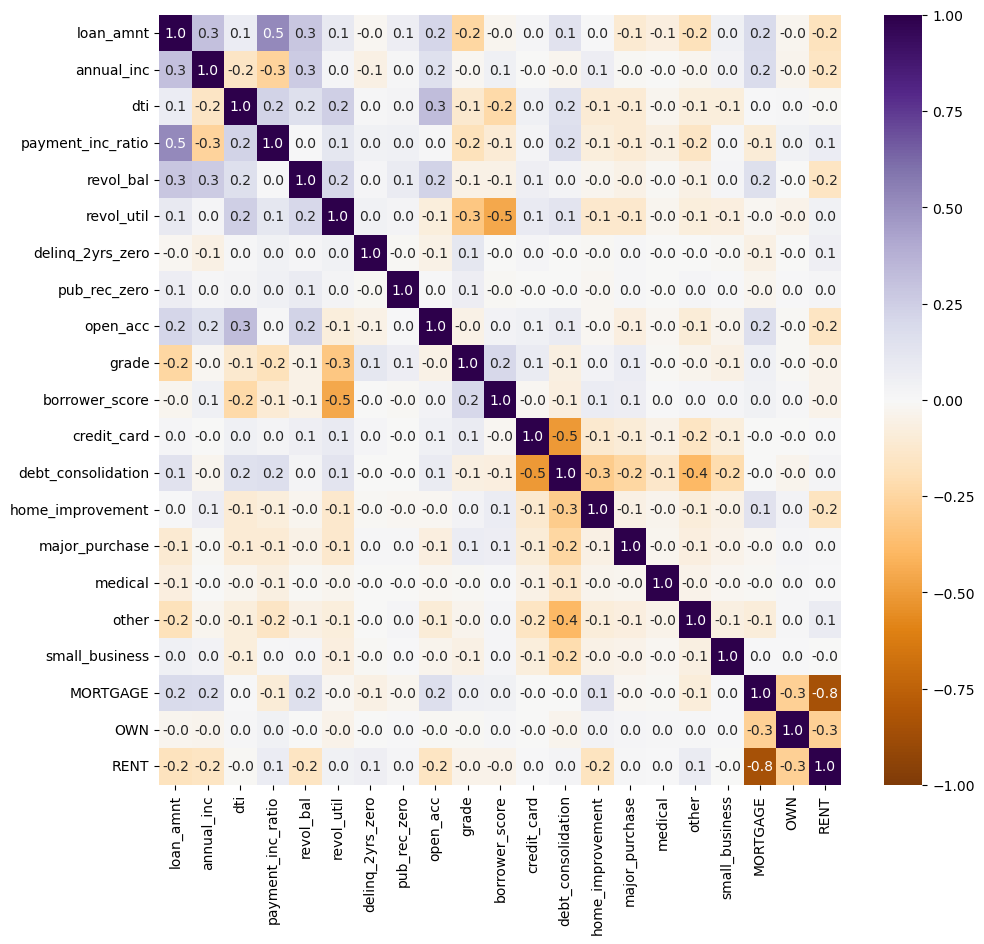

In [19]:
fig, ax = plt.subplots(figsize=(11, 10))

sb.heatmap(X.corr(),
           annot=True, cmap="PuOr",fmt=".1f",
           vmin=-1, vmax=1)

## Train a simple classifier model: k-nearest neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

In [22]:
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [23]:
predictions = model.predict(X)

In [24]:
X.shape

(45342, 21)

In [25]:
predictions[:100]

array(['default', 'default', 'default', 'default', 'default', 'paid off',
       'default', 'default', 'default', 'default', 'paid off', 'paid off',
       'default', 'default', 'default', 'default', 'default', 'default',
       'default', 'default', 'default', 'default', 'default', 'default',
       'default', 'default', 'default', 'default', 'default', 'default',
       'default', 'paid off', 'default', 'paid off', 'default', 'default',
       'paid off', 'paid off', 'default', 'default', 'default',
       'paid off', 'paid off', 'default', 'default', 'default',
       'paid off', 'default', 'default', 'default', 'default', 'default',
       'default', 'default', 'default', 'default', 'paid off', 'default',
       'default', 'default', 'default', 'default', 'default', 'default',
       'default', 'default', 'default', 'paid off', 'default', 'default',
       'default', 'default', 'default', 'paid off', 'default', 'default',
       'default', 'default', 'default', 'paid off', 'default

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, predictions)

array([[22637,    34],
       [   84, 22587]], dtype=int64)

## Use scikit-learn Pipeline

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=3)),
])

In [28]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [29]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [30]:
predictions = pipe.predict(X)
confusion_matrix(y, predictions)

array([[17780,  4891],
       [ 4686, 17985]], dtype=int64)

Text(24.0, 0.5, 'Predicted label')

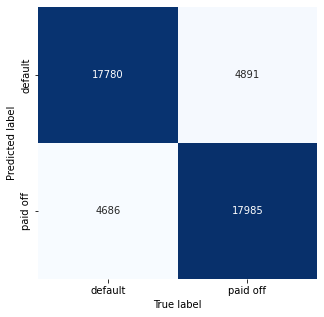

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y, predictions),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=pipe.classes_,
           yticklabels=pipe.classes_)
ax.set_xlabel("True label")
ax.set_ylabel("Predicted label")

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=30)
model.fit(X, y)

DecisionTreeClassifier(max_depth=30)

In [30]:
predictions = model.predict(X)
confusion_matrix(y, predictions)

array([[22637,    34],
       [   84, 22587]], dtype=int64)

Text(33.222222222222214, 0.5, 'Predicted label')

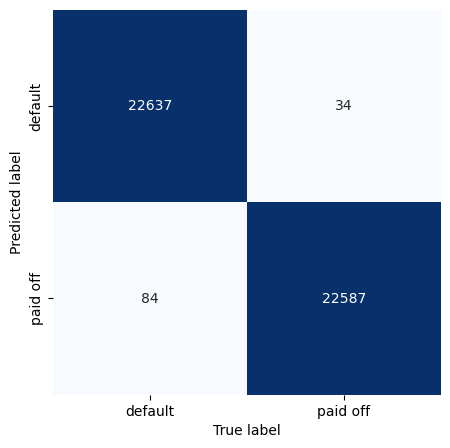

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y, predictions),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=model.classes_,
           yticklabels=model.classes_)
ax.set_xlabel("True label")
ax.set_ylabel("Predicted label")

### Is that good? Or too good?

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [34]:
model = DecisionTreeClassifier(max_depth=30)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [35]:
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[3233, 2436],
       [2372, 3295]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

print("Accuracy (train):", accuracy_score(y_train, model.predict(X_train)))
print("Accuracy (test):", accuracy_score(y_test, model.predict(X_test)))

Accuracy (train): 0.9990589895900723
Accuracy (test): 0.5758645024700071


In [37]:
conf_mat = confusion_matrix(y_test, model.predict(X_test))

In [38]:
conf_mat[0, 0] / conf_mat[:, 0].sum()

0.5768064228367529

In [39]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [40]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model,
                    param_grid={
                        "max_depth": [2, 3, 4, 5, 10, 15, 20]
                    },
                    cv=3,
                    return_train_score=True,
                    verbose=2,
                   )

In [41]:
grid.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=30),
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20]},
             return_train_score=True)

In [42]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.144871,0.012737,0.058720,0.007200,2,{'max_depth': 2},0.596004,0.619095,0.593754,0.602951,0.011452,5,0.621907,0.607020,0.620154,0.616360,0.006643
1,0.204674,0.015992,0.054880,0.006588,3,{'max_depth': 3},0.601694,0.629350,0.628689,0.619911,0.012884,3,0.656047,0.635305,0.643212,0.644855,0.008547
2,0.250297,0.024901,0.057596,0.008903,4,{'max_depth': 4},0.602355,0.640069,0.631534,0.624653,0.016147,2,0.658297,0.642947,0.646652,0.649299,0.006540
3,0.290453,0.006888,0.042548,0.008136,5,{'max_depth': 5},0.603083,0.644436,0.640333,0.629284,0.018602,1,0.668155,0.651548,0.652772,0.657492,0.007557
4,0.517367,0.022792,0.066749,0.003646,10,{'max_depth': 10},0.581712,0.622205,0.618764,0.607560,0.018331,4,0.715165,0.700840,0.711426,0.709144,0.006067
5,0.707486,0.037128,0.062184,0.000897,15,{'max_depth': 15},0.562856,0.584293,0.582771,0.576640,0.009767,6,0.836178,0.816528,0.841207,0.831304,0.010648
6,0.847923,0.006227,0.057929,0.007512,20,{'max_depth': 20},0.553196,0.561929,0.575030,0.563385,0.008973,7,0.943695,0.940850,0.951899,0.945481,0.004684


Text(0.5, 0, 'max_depth')

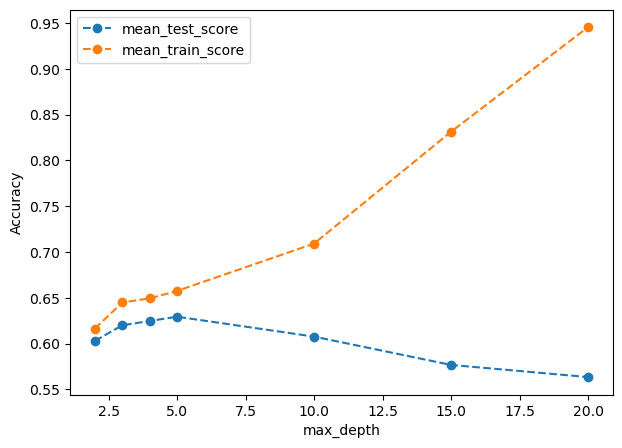

In [43]:
fig, ax = plt.subplots(figsize=(7, 5))

results.plot(x="param_max_depth", y="mean_test_score",
             marker="o", linestyle="--", ax=ax)
results.plot(x="param_max_depth", y="mean_train_score",
             marker="o", linestyle="--", ax=ax)
ax.set_ylabel("Accuracy")
ax.set_xlabel("max_depth")

In [44]:
grid = GridSearchCV(estimator=model,
                    param_grid={
                        "max_depth": [3, 4, 5, 6, 8, 10, 15],
                        "criterion": ["gini", "entropy"]
                    },
                    cv=3,
                    return_train_score=True,
                    verbose=2,
                   )
grid.fit(X, y)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.3s
[CV] END ........................criterion=gini,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=30),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 8, 10, 15]},
             return_train_score=True, verbose=2)

In [46]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
9,0.351123,0.018881,0.076340,0.003606,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.604340,0.644237,0.639606,0.629394,0.017816,1,0.660811,0.651515,0.651912,0.654746,0.004292
2,0.294562,0.010493,0.055747,0.007333,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.603083,0.644436,0.640333,0.629284,0.018602,2,0.668155,0.651548,0.652772,0.657492,0.007557
3,0.366558,0.013620,0.058020,0.008219,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.601958,0.640797,0.639804,0.627520,0.018079,3,0.673879,0.655750,0.659488,0.663039,0.007815
8,0.290085,0.020912,0.072074,0.004862,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.609832,0.640069,0.631534,0.627145,0.012728,4,0.654195,0.642947,0.646652,0.647931,0.004680
10,0.440664,0.010667,0.066694,0.006458,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.601363,0.639606,0.639407,0.626792,0.017981,5,0.670901,0.655220,0.658925,0.661682,0.006692
1,0.249800,0.023471,0.057911,0.008116,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.602355,0.640069,0.631534,0.624653,0.016147,6,0.658297,0.642947,0.646652,0.649299,0.006540
4,0.429689,0.039712,0.057135,0.011004,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.592629,0.637025,0.636364,0.622006,0.020774,7,0.691081,0.673217,0.679668,0.681322,0.007386
11,0.576156,0.053359,0.059183,0.009145,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.592232,0.638679,0.634180,0.621697,0.020916,8,0.684895,0.670140,0.672654,0.675897,0.006445
0,0.200347,0.005163,0.055375,0.007542,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.601694,0.629350,0.628689,0.619911,0.012884,9,0.656047,0.635305,0.643212,0.644855,0.008547
7,0.248701,0.020757,0.068120,0.006096,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.584557,0.629350,0.628689,0.614199,0.020961,10,0.645031,0.635305,0.643212,0.641183,0.004222
